# DSCI-508 Project 6 - Graph Coding Assignment
### Matt Snyder

In [11]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

### Load dataframe from file

In [2]:
df = pd.read_csv('mpg.csv')
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### Encode the year as numeric columns

In [47]:
year_df = df[['year']] # single column datafram
year_labels = sorted(year_df['year'].unique()) # years as integers
year_labels = [f'{y}' for y in year_labels] # years as strings

# encoder produces numpy array
encoder = OneHotEncoder(sparse_output=False)
encoder.fit(year_df)
year_enc = encoder.transform(year_df) 

# convert array to datafram
year_enc_df = pd.DataFrame(year_enc.astype('int')) 
year_enc_df.columns = year_labels

# add encoded dataframe to main dataframe
df_enc = pd.concat([df, year_enc_df], axis=1)
df_enc.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,1999,2008
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,1,0
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,1,0
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,0,1
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,0,1
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,1,0


### Group by displacement, then aggregate counts of encoded years

In [39]:
columns = ['displ'] + year_labels
df_grouped = df_enc.loc[:, columns].groupby('displ').sum()
df_grouped.head()

,1999,2008
displ,,
1.6,5,0
1.8,9,5
1.9,3,0
2.0,8,13
2.2,6,0


### Create Stacked Bar Plot

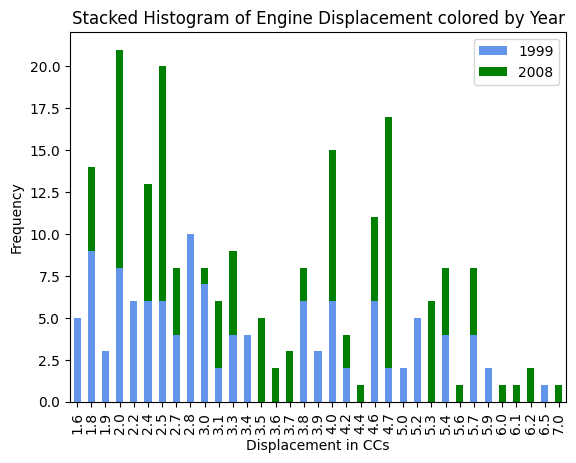

In [48]:
# basic plot from pandas
df_grouped.plot(kind='bar', stacked=True, color=['cornflowerblue', 'green']) 

# add title and axes labels using matplotlib
plt.title('Stacked Histogram of Engine Displacement colored by Year')
plt.ylabel('Frequency')
plt.xlabel('Displacement in CCs')
plt.show()